GBENRO SAMUEL (GSAM)
linkedin:
    https://www.linkedin.com/in/gbenro-samuel-b637a91b3/




# Dataset Information
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

This is a standard supervised classification task.A classification problem where we have to predict whether a loan would be approved or not. Below is the dataset attributes with description.

Variable	Description
Loan_ID	Unique Loan ID
Gender	Male/ Female
Married	Applicant married (Y/N)
Dependents	Number of dependents
Education	Applicant Education (Graduate/ Under Graduate)
Self_Employed	Self employed (Y/N)
ApplicantIncome	Applicant income
CoapplicantIncome	Coapplicant income
LoanAmount	Loan amount in thousands
Loan_Amount_Term	Term of loan in months
Credit_History	credit history meets guidelines
Property_Area	Urban/ Semi Urban/ Rural
Loan_Status	Loan approved (Y/N)
Download link: https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset

Libraries
pandas
matplotlib
seaborn
scikit-learn
Algorithms
Logistic Regression
Decision Tree
Random Forest
Extra Tress
Best Model Accuracy: 80.78%

In [4]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")



import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer


In [8]:
#read the file 
df = pd.read_csv("loan prediction dataset.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
df.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#find the null values 

In [13]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#fill the missing values for numerical terms - mean

In [14]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())


#fill the missing values for categorical terms - mode

In [15]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

#check for null values again

In [16]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

There is no null values again in the above 

# EXPLORATORY DATA ANALYSIS
CATEGORICAL ATTRIBUTE VISUALISATION

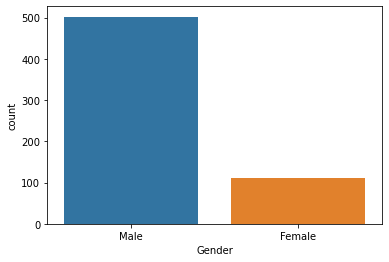

In [17]:
sns.countplot(df['Gender'])

The above diagram shows that male gender have more percentage than the female gender acording to this dataset

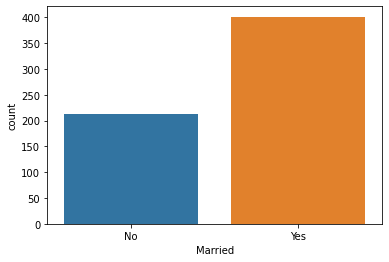

In [19]:
sns.countplot(df['Married'])

from the above plot more are married 

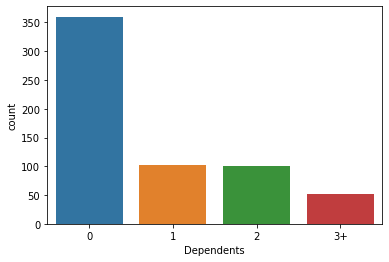

In [20]:
sns.countplot(df['Dependents'])

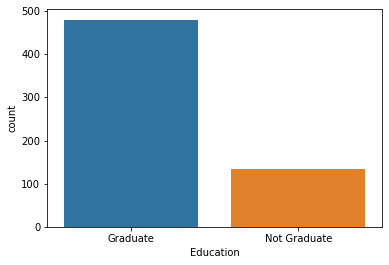

In [21]:
sns.countplot(df['Education'])

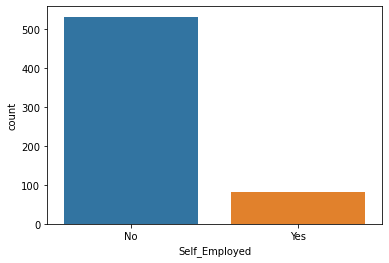

In [22]:
sns.countplot(df['Self_Employed'])

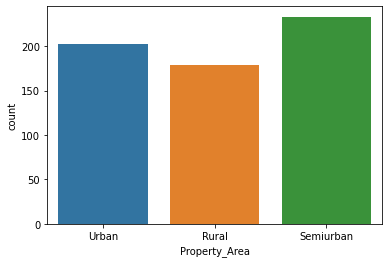

In [23]:
sns.countplot(df['Property_Area'])

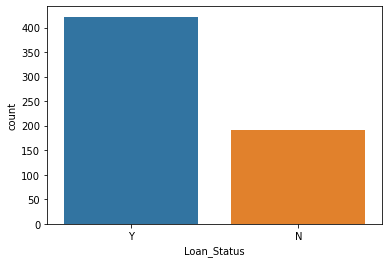

In [24]:
sns.countplot(df['Loan_Status'])

NUMERICAL ATTRIBUTE VISUALIZATION

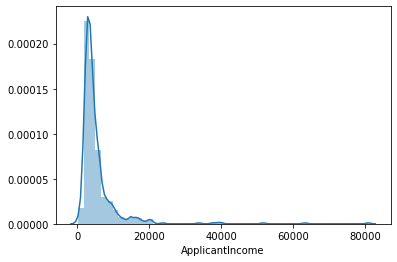

In [25]:
sns.distplot(df['ApplicantIncome'])

#in the above diagram we see that most of the applicant earn lesser than 20000 few earn more and it is not suitable for training our model so we will apply log transformation to the attribute to normalise it 

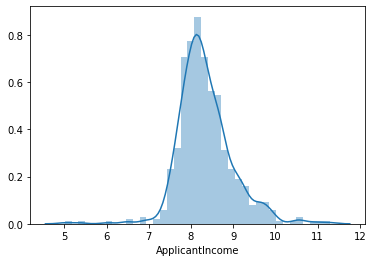

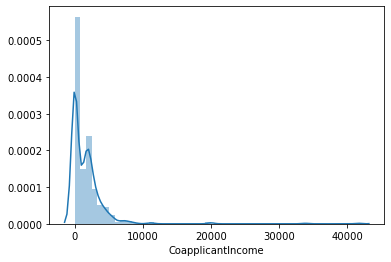

In [144]:
sns.distplot(df['CoapplicantIncome'])

you can see that the graph above is not well distributed and the coapplicantincome is lesser than 10000 

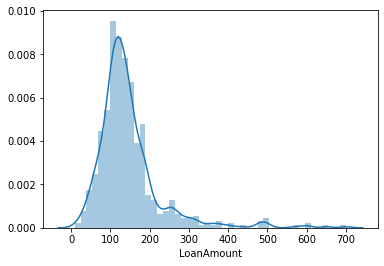

In [26]:
sns.distplot(df['LoanAmount'])

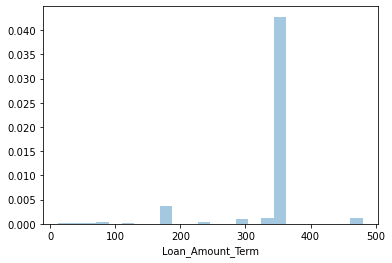

In [27]:
sns.distplot(df['Loan_Amount_Term'])

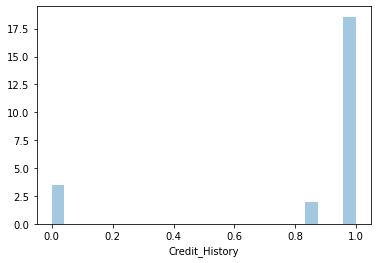

In [28]:
sns.distplot(df['Credit_History'])

##creation of new attribute

In [ ]:
##total income

In [29]:
df['Total_income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


##logtransfomation

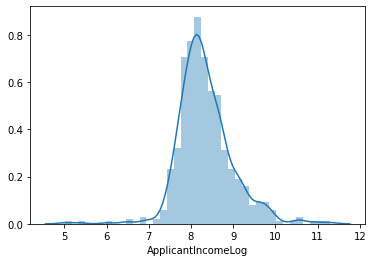

In [30]:
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])
sns.distplot(df['ApplicantIncomeLog'])

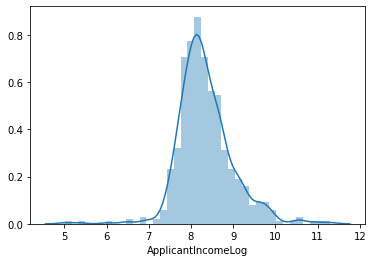

In [31]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome'])
sns.distplot(df['ApplicantIncomeLog'])

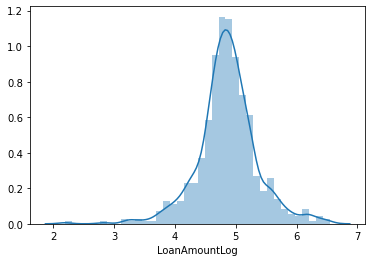

In [32]:
df['LoanAmountLog'] = np.log(df['LoanAmount'])
sns.distplot(df['LoanAmountLog'])

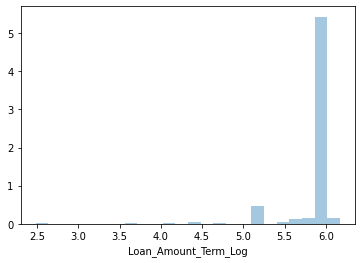

In [33]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])
sns.distplot(df['Loan_Amount_Term_Log'])


# corolation matrix

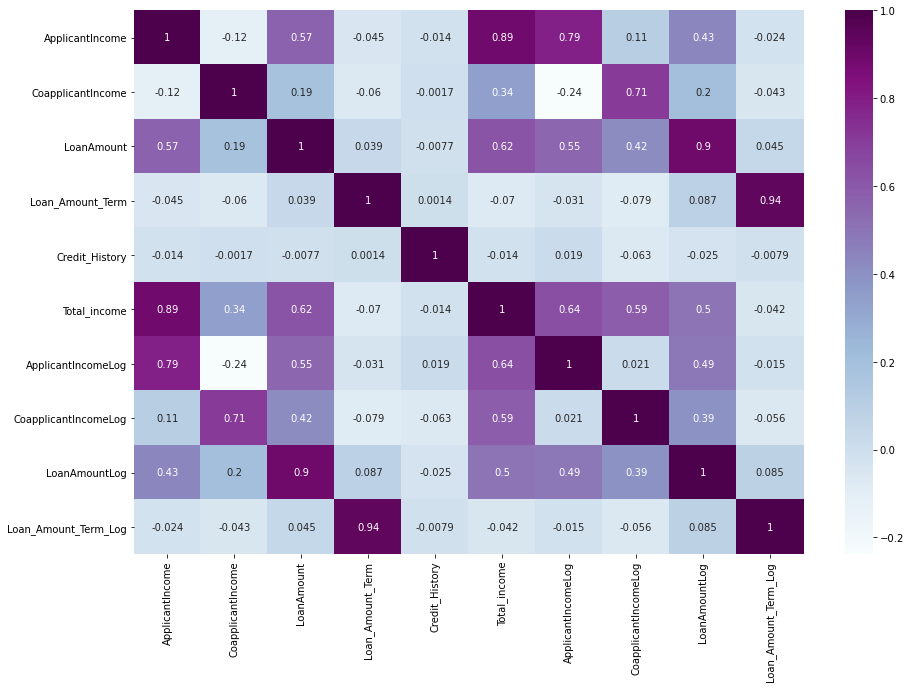

In [34]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap = 'BuPu')

In [ ]:
#from the above corrolation matric we need to drop some colunmn because they are corrolated 

In [35]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,-inf,4.986426,5.886104
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,7.318540,4.852030,5.886104
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,-inf,4.189655,5.886104
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,7.765569,4.787492,5.886104
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,-inf,4.948760,5.886104


In [36]:
cols = ['ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','CoapplicantIncomeLog','Loan_ID']
df = df.drop(columns = cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_income,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,5849.0,8.674026,4.986426,5.886104
1,Male,Yes,1,Graduate,No,1.0,Rural,N,6091.0,8.430109,4.852030,5.886104
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,3000.0,8.006368,4.189655,5.886104
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,4941.0,7.856707,4.787492,5.886104
4,Male,No,0,Graduate,No,1.0,Urban,Y,6000.0,8.699515,4.948760,5.886104


Now in our above dataset we can see that we have alot of categorical attribute so we will need to convert it to numerical attribute in other to work futher and one way to do that amigst others is LABEL ENCODING

In [37]:
from sklearn.preprocessing import LabelEncoder
cols =['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status','Dependents']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])


In [39]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_income,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log
0,1,0,0,0,0,1.0,2,1,5849.0,8.674026,4.986426,5.886104
1,1,1,1,0,0,1.0,0,0,6091.0,8.430109,4.852030,5.886104
2,1,1,0,0,1,1.0,2,1,3000.0,8.006368,4.189655,5.886104
3,1,1,0,1,0,1.0,2,1,4941.0,7.856707,4.787492,5.886104
4,1,0,0,0,0,1.0,2,1,6000.0,8.699515,4.948760,5.886104


TEST AND SPLIT DATA 

SPECIFY INPUT AND OUTPUT ATTRIBUTE

In [40]:
x = df.drop(columns = ['Loan_Status'], axis=1)
y =  df['Loan_Status']

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# MODEL TRAINING

lets define classify function in other to reuse the code 


In [53]:
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print('accuracy is', model.score(x_test, y_test)*100)
    
    #cross validation - it is used for better validation of model 
    #e.g: cv-5, train-4, test-1


In [64]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, x, y)
score = cross_val_score(model, x, y, cv=5)
print('cross validation is,',np.mean(score)*100)


accuracy is 64.93506493506493
cross validation is, 80.7823537251766


In [57]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, x, y)
score = cross_val_score(model, x, y, cv=5)
print('cross validation is,',np.mean(score)*100)


accuracy is 71.42857142857143
cross validation is, 71.66600026656003


In [58]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, x, y)
score = cross_val_score(model, x, y, cv=5)
print('cross validation is,',np.mean(score)*100)


accuracy is 77.27272727272727
cross validation is, 77.85552445688391


In [59]:
model = ExtraTreesClassifier()
classify(model, x, y)
score = cross_val_score(model, x, y, cv=5)
print('cross validation is,',np.mean(score)*100)


accuracy is 74.02597402597402
cross validation is, 76.22684259629482


we can change some hyperparameter to improve the accuracy HYPERPARAMETER TUNNING

In [60]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, x, y)
score = cross_val_score(model, x, y, cv=5)
print('cross validation is,',np.mean(score)*100)


accuracy is 77.27272727272727
cross validation is, 80.62241769958683


# confusion matrix

In [61]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [62]:
from sklearn.metrics import confusion_matrix
y_pred= model.predict(x_test)
cm = confusion_matrix (y_test,y_pred)
cm

array([[25, 29],
       [ 5, 95]], dtype=int64)

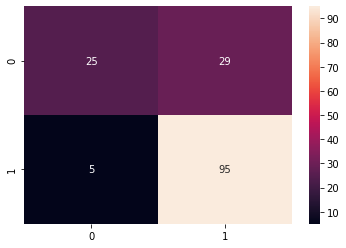

In [63]:
sns.heatmap(cm, annot=True)